In [3]:
import hashlib
import psutil
import os
import csv
from prettytable import PrettyTable

# Generate deterministic datasets for testing
def generate_deterministic_datasets(total, size_mb):
    size_bytes = size_mb * 1024 * 1024  # Convert MB to Bytes
    return [("a" * size_bytes) for _ in range(total)]

# Measure resource usage
def measure_resource_usage(algorithm, data_size_mb, iterations):
    # Generate deterministic datasets
    data = generate_deterministic_datasets(iterations, data_size_mb)

    # Select the hashing algorithm
    hash_function = hashlib.new(algorithm)

    # Get the current process
    process = psutil.Process(os.getpid())

    # Track peak memory usage
    peak_memory_kb = 0

    # Perform hashing and monitor memory
    for s in data:
        hash_function.update(s.encode('utf-8'))
        hash_function.hexdigest()
        # Check current memory usage
        current_memory_kb = process.memory_info().rss / 1024 / 1024  # Memory in KB
        peak_memory_kb = max(peak_memory_kb, current_memory_kb)

    # Calculate average CPU usage
    avg_cpu_usage = psutil.cpu_percent(interval=None)

    return avg_cpu_usage, peak_memory_kb

# Test resource usage
def test_resource_usage(algorithms, data_sizes_mb, iterations):
    results = []
    for algo in algorithms:
        for size_mb in data_sizes_mb:
            avg_cpu, peak_memory = measure_resource_usage(algo, size_mb, iterations)
            results.append([algo, size_mb, iterations, avg_cpu, peak_memory])
    return results

# Main function
def main():
    # Algorithms to test
    algorithms = ['md5', 'sha1', 'sha256', 'sha3_256', 'blake2s', 'blake2b']
    # Data sizes to test (MB)
    data_sizes_mb = [1, 2, 4, 8, 16, 32]
    # Fixed number of iterations
    iterations = 10

    # Prepare PrettyTable for terminal output
    table = PrettyTable()
    table.field_names = ["Algorithm", "Data Size (MB)", "Iterations", "CPU (%)", "Peak Memory (KB)"]

    # Perform tests
    results = test_resource_usage(algorithms, data_sizes_mb, iterations)
    for result in results:
        table.add_row([result[0], result[1], result[2], f"{result[3]:.2f}", f"{result[4]:.2f}"])

    # Write results to CSV
    csv_file = 'hashing_resource_results.csv'
    with open(csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Algorithm", "Data Size (MB)", "Iterations", "CPU (%)", "Peak Memory (KB)"])
        for result in results:
            writer.writerow(result)
    
    print(f"Resource results have been written to {csv_file}")
    print(table)

if __name__ == "__main__":
    main()


Resource results have been written to hashing_resource_results.csv
+-----------+----------------+------------+---------+------------------+
| Algorithm | Data Size (MB) | Iterations | CPU (%) | Peak Memory (KB) |
+-----------+----------------+------------+---------+------------------+
|    md5    |       1        |     10     |   1.80  |      120.38      |
|    md5    |       2        |     10     |   5.10  |      130.38      |
|    md5    |       4        |     10     |   7.10  |      150.38      |
|    md5    |       8        |     10     |   4.90  |      190.38      |
|    md5    |       16       |     10     |   4.70  |      270.38      |
|    md5    |       32       |     10     |   5.60  |      430.38      |
|    sha1   |       1        |     10     |   9.10  |      120.38      |
|    sha1   |       2        |     10     |   8.70  |      130.38      |
|    sha1   |       4        |     10     |   5.00  |      150.38      |
|    sha1   |       8        |     10     |   4.30  |    

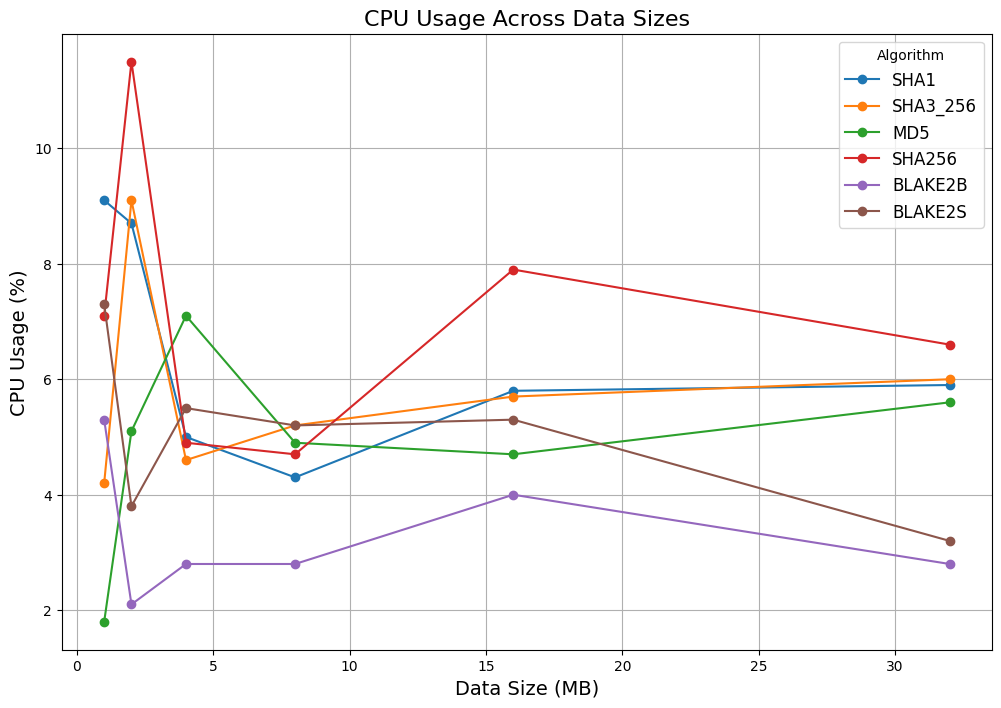

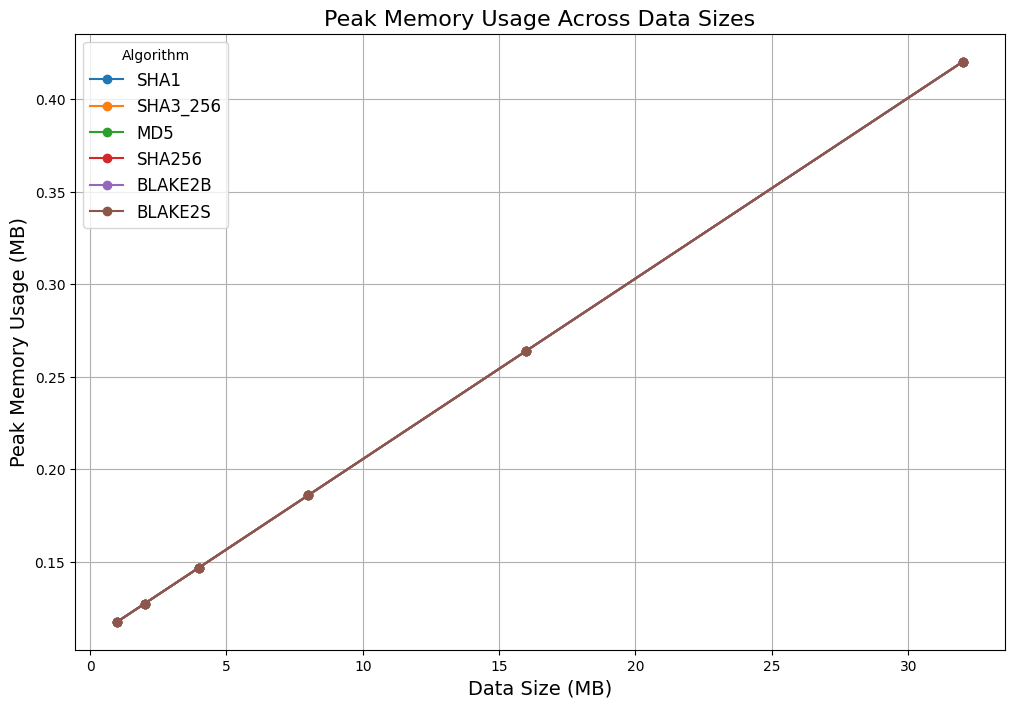

In [4]:
import matplotlib.pyplot as plt
import csv

# Function to read results from a CSV file
def read_resource_results_from_csv(file_path):
    results = []
    with open(file_path, mode='r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            # Convert relevant fields to appropriate types
            results.append([row[0], int(row[1]), int(row[2]), float(row[3]), float(row[4])])
    return results

# Visualization of CPU Usage
def visualize_cpu_usage(file_path):
    # Read results from CSV
    results = read_resource_results_from_csv(file_path)
    
    # Organize data for plotting
    data = {algo: {"sizes": [], "cpu": []} for algo in set(result[0] for result in results)}
    for algo, size_mb, _, cpu, _ in results:
        data[algo]["sizes"].append(size_mb)
        data[algo]["cpu"].append(cpu)
    
    # Plot each algorithm's CPU usage
    plt.figure(figsize=(12, 8))
    for algo in data.keys():
        plt.plot(data[algo]["sizes"], data[algo]["cpu"], marker='o', label=algo.upper())

    # Chart details
    plt.title("CPU Usage Across Data Sizes", fontsize=16)
    plt.xlabel("Data Size (MB)", fontsize=14)
    plt.ylabel("CPU Usage (%)", fontsize=14)
    plt.legend(title="Algorithm", fontsize=12)
    plt.grid(True)
    plt.show()

# Visualization of Peak Memory Usage
def visualize_memory_usage(file_path):
    # Read results from CSV
    results = read_resource_results_from_csv(file_path)
    
    # Organize data for plotting
    data = {algo: {"sizes": [], "memory": []} for algo in set(result[0] for result in results)}
    for algo, size_mb, _, _, memory_kb in results:
        data[algo]["sizes"].append(size_mb)
        data[algo]["memory"].append(memory_kb / 1024)  # Convert KB to MB for readability
    
    # Plot each algorithm's memory usage
    plt.figure(figsize=(12, 8))
    for algo in data.keys():
        plt.plot(data[algo]["sizes"], data[algo]["memory"], marker='o', label=algo.upper())

    # Chart details
    plt.title("Peak Memory Usage Across Data Sizes", fontsize=16)
    plt.xlabel("Data Size (MB)", fontsize=14)
    plt.ylabel("Peak Memory Usage (MB)", fontsize=14)
    plt.legend(title="Algorithm", fontsize=12)
    plt.grid(True)
    plt.show()

# Example usage:
# Replace 'hashing_resource_results.csv' with the path to your CSV file
csv_file_path = 'hashing_resource_results.csv'

# Visualize CPU and Memory usage
visualize_cpu_usage(csv_file_path)
visualize_memory_usage(csv_file_path)
